In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Making Target Star Array:

In [2]:
import numpy as np 

filelist = np.loadtxt('log.txt', dtype=str)

# flux of target stars

flux_target = np.array([])
flux_uncert = np.array([])
ra_target = np.array([])
dec_target = np.array([]) 

count = 0 

# RA: 2:57:10.31 hr:min:s => 44.29295833333333 [deg] 

target_ra = (2*15)+(15*(57/60))+(15*10.31/3600) # [deg] 
print(target_ra)

for i in range(len(filelist)):
    
    data = np.loadtxt(filelist[i])
    ra = data[:,3] # [deg]
    dec = data[:,4]
    flux = data[:,5] 
    flux_err = data[:,6] 
    target_ra = 44.29296 # rounding off to fifth decimal place 

    diff = np.abs(ra - target_ra)
    
    # index for minimum difference (i.e. index for RA closest to target star) 
    # use this index to access all other values for the target 

    target = np.argmin(diff) 
        
    target_RA = ra[target] # [deg] 
    target_DEC = dec[target] # [deg] 
    target_flux = flux[target]
    target_flux_uncert = flux_err[target]

    flux_target = np.append(flux_target, target_flux)
    flux_uncert = np.append(flux_uncert, target_flux_uncert)

    ra_target = np.append(ra_target, target_RA)
    dec_target = np.append(dec_target, target_DEC)

#print(count)

#print(flux_target)

with open('./analysis_files/{}.dat'.format('target_star'), 'w+') as file: 
    for RA, DEC, FLUX, FLUX_UNCERT in zip(ra_target, dec_target, flux_target, flux_uncert):
        file.write('{:20}\t{:20}\t{:20}\t{:20}\n'.format(RA,DEC,FLUX,FLUX_UNCERT))
    file.close()



44.29295833333333


Time Array

In [3]:
# determination hr:mm:ss.s from DATE-OBS

#loading text file which as file name and exposure time.
f=np.loadtxt('DATE-OBS.txt', dtype=str)


#take only the file names or first coloumn
c=np.array([f[:,1]])

#it's a 2D array, so we convert it to 1D for analysis
s=c.flatten()

#print(s.shape)
#print(s)

#Now we split the text in the file in strings in a list w 
#the end goal is get the number, we dont want the T so we get rid of it
w=np.array([])
for i in s:
    y=i.split('T')
    w=np.append(w,y)

#prints out shape of the w array now it has date and time

print(w.shape)

#However it is 1D so we need to convert to 2D to retrive time
n=np.reshape(w, (319,2))

#saving hour in p
p=n[:,1]


#now the string from the array in hh:mm:ss.sss to just ss.sss
import datetime

cal_time=np.array([])
for i in range(len(p)):
    test=p[i]
    h,m,s=test.split(':')
    total_sec=(datetime.timedelta(hours=int(h),minutes=int(m),seconds=float(s)).total_seconds())
    cal_time=np.append(cal_time,total_sec)

cal_time=cal_time/60
#print(fin_array)

(638,)


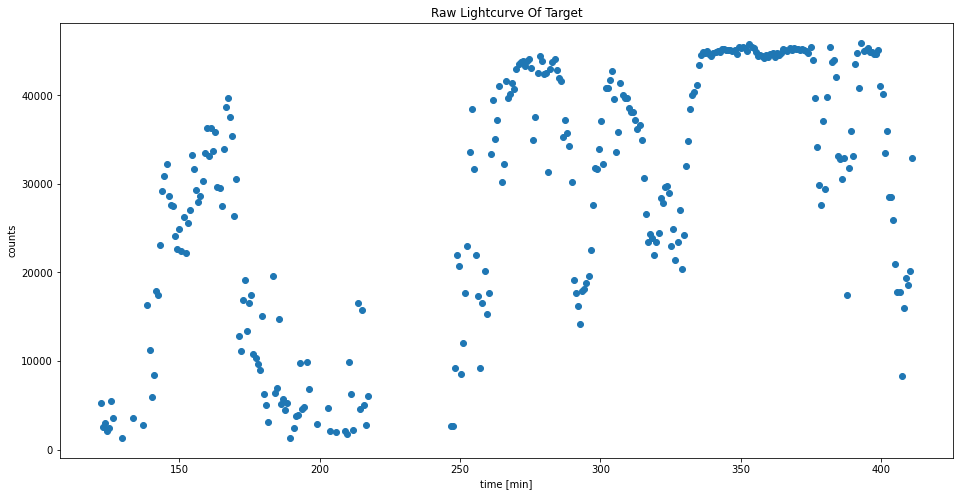

In [4]:
import matplotlib.pyplot as plt

#target_data = np.loadtxt('./analysis_files/target_star.dat')
target_data = np.loadtxt('./deblended_target_star.dat')

target_flux = target_data[:,2]
targ_uncert= target_data[:,3]



plt.figure(figsize=[16, 8])
plt.title('Raw Lightcurve Of Target')
plt.scatter(cal_time, target_flux, label='target star')
plt.ylabel('counts')
plt.xlabel('time [min]')
plt.show()

Choosing Ref Stars

In [5]:
import numpy as np
filelist = np.loadtxt('log.txt', dtype=str)

count = 0 

# ra of stars that are close to target 
# ====================================
ref_ra = np.array([44.3404061, 44.4029161, 44.4315991, 44.2857892, 44.1930316, 44.3772505, 44.2431082, 
                   44.2634690])# [deg] 

ref_dec= np.array([33.3369666, 33.3092817, 33.3183173, 33.3015440, 33.2889147, 33.2718137, 33.4359263, 
                   33.4290985])

#print(np.shape(ref_ra))
#print(np.shape(ref_dec))
# For the target 
# ==============
# RA: 2:57:10.31 hr:min:s => 44.29295833333333 [deg] 

target_ra = (2*15)+(15*(57/60))+(15*10.31/3600) # [deg] 
print(target_ra)

count = 1 


flux_ref = np.array([])
flux_uncert = np.array([])
ra_ref = np.array([])
dec_ref = np.array([])

ref_ind = np.array([]) 

for jj in range(len(ref_ra)):
    flux_ref = np.array([])
    flux_uncert = np.array([])
    ra_ref = np.array([])
    dec_ref = np.array([])

    for i in range(len(filelist)):

        data = np.loadtxt(filelist[i])
    
        ra = data[:,3] # [deg]
        dec = data[:,4]
        flux = data[:,5] 
        flux_err = data[:,6] 
        
        reference_ra = ref_ra[jj]
        referance_dec= ref_dec[jj]
        
        dec=dec-referance_dec
        ra=ra-reference_ra

        diff = np.abs(np.sqrt(ra**2+dec**2))
    
    # index for minimum difference (i.e. index for RA closest to reference RA's)
    # use this index to access all other values for the reference stars 

        ref = np.argmin(diff) 
       
        ref_RA = ra[ref] # [deg] 
        
        ref_DEC = dec[ref] # [deg] 
        ref_flux = flux[ref]
        ref_flux_uncert = flux_err[ref]

        flux_ref = np.append(flux_ref, ref_flux)
        flux_uncert = np.append(flux_uncert, ref_flux_uncert)

        ra_ref = np.append(ra_ref, ref_RA)
        dec_ref = np.append(dec_ref, ref_DEC)

    #print(jj+1, np.shape(ra_ref), np.shape(dec_ref), np.shape(flux_ref), np.shape(flux_uncert))

    
    with open('./analysis_files/{}_{}.dat'.format('refstar', jj+1), 'w+') as file:            

        for RA, DEC, FLUX, FLUX_UNCERT in zip(ra_ref, dec_ref, flux_ref, flux_uncert):
            file.write('{:20}\t{:20}\t{:20}\t{:20}\n'.format(RA,DEC,FLUX,FLUX_UNCERT))
        file.close() 
    


        
'''
with open('./analysis_files/{}.dat'.format('target_star'), 'w+') as file: 
    for RA, DEC, FLUX, FLUX_UNCERT in zip(ra_target, dec_target, flux_target, flux_uncert):
        file.write('{:20}\t{:20}\t{:20}\t{:20}\n'.format(RA,DEC,FLUX,FLUX_UNCERT))
    file.close()
''' 

44.29295833333333


"\nwith open('./analysis_files/{}.dat'.format('target_star'), 'w+') as file: \n    for RA, DEC, FLUX, FLUX_UNCERT in zip(ra_target, dec_target, flux_target, flux_uncert):\n        file.write('{:20}\t{:20}\t{:20}\t{:20}\n'.format(RA,DEC,FLUX,FLUX_UNCERT))\n    file.close()\n"

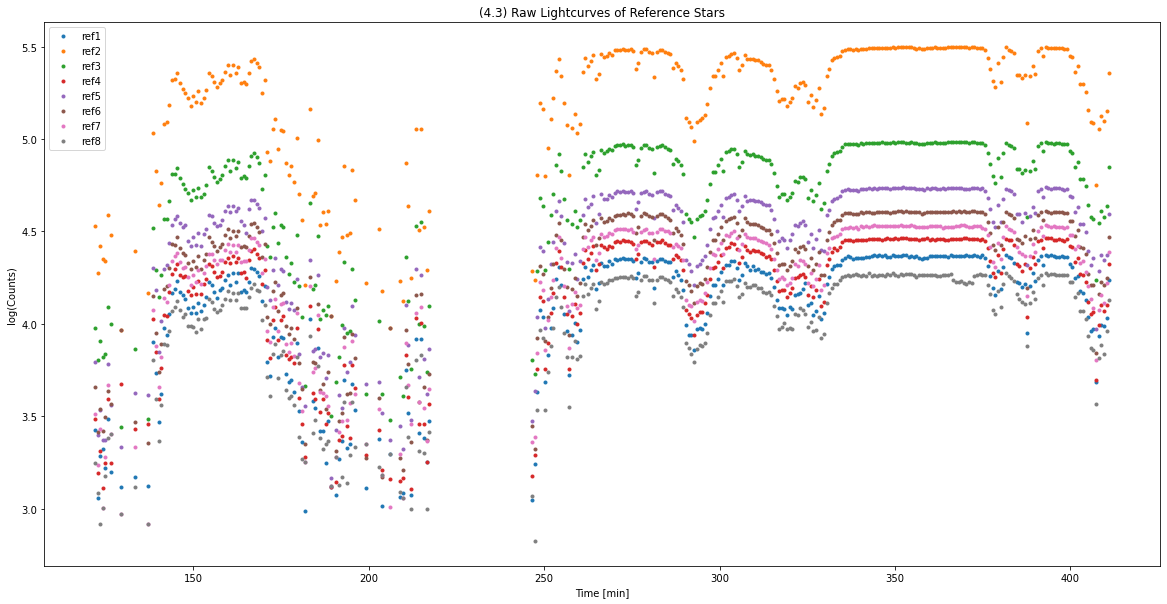

In [10]:
plt.figure(figsize=(20,10))
time = cal_time

target = target_flux
ref1 = np.loadtxt('./analysis_files/refstar_1.dat')
ref2 = np.loadtxt('./analysis_files/refstar_2.dat')
ref3 = np.loadtxt('./analysis_files/refstar_3.dat')
ref4 = np.loadtxt('./analysis_files/refstar_4.dat')
ref5 = np.loadtxt('./analysis_files/refstar_5.dat')
ref6 = np.loadtxt('./analysis_files/refstar_6.dat')
ref7 = np.loadtxt('./analysis_files/refstar_7.dat')
ref8 = np.loadtxt('./analysis_files/refstar_8.dat')

plt.title('(4.3) Raw Lightcurves of Reference Stars')
#plt.plot(fin_array, np.log10(target_flux), '.', label = 'TOI 1636.01')
plt.plot(time, np.log10(ref1[:,2]), '.', label = 'ref1')
plt.plot(time, np.log10(ref2[:,2]), '.', label = 'ref2')
plt.plot(time, np.log10(ref3[:,2]), '.', label = 'ref3')
plt.plot(time, np.log10(ref4[:,2]), '.', label = 'ref4')
plt.plot(time, np.log10(ref5[:,2]), '.', label = 'ref5')
plt.plot(time, np.log10(ref6[:,2]), '.', label = 'ref6')
plt.plot(time, np.log10(ref7[:,2]), '.', label = 'ref7')
plt.plot(time, np.log10(ref8[:,2]), '.', label = 'ref8')
plt.xlabel('Time [min]')
plt.ylabel('log(Counts)')
plt.legend()
plt.show()

<h2><center> Section 4.4 Plotting Average Noramlised Reference Flux

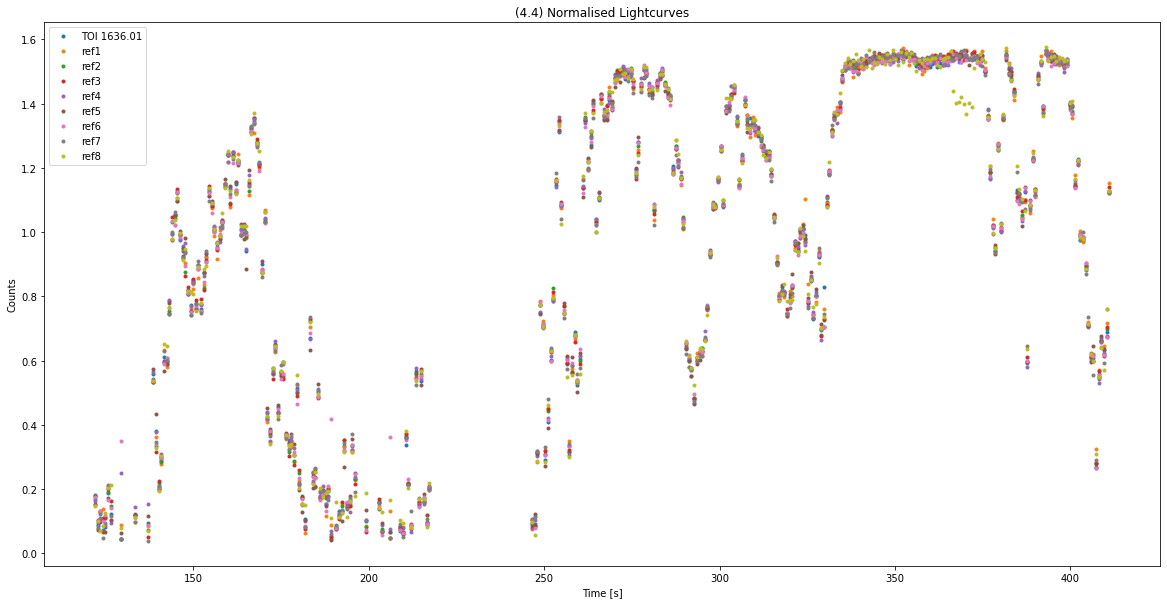

In [11]:
plt.figure(figsize=(20,10))
ref_star_raw_1 = np.loadtxt('./analysis_files/refstar_1.dat')
ref_star_raw_2 = np.loadtxt('./analysis_files/refstar_2.dat')
ref_star_raw_3 = np.loadtxt('./analysis_files/refstar_3.dat')
ref_star_raw_4 = np.loadtxt('./analysis_files/refstar_4.dat')
ref_star_raw_5 = np.loadtxt('./analysis_files/refstar_5.dat')
ref_star_raw_6 = np.loadtxt('./analysis_files/refstar_6.dat')
ref_star_raw_7 = np.loadtxt('./analysis_files/refstar_7.dat')
ref_star_raw_8 = np.loadtxt('./analysis_files/refstar_8.dat')


#ref_flux=ref_star_raw_1[:,2]
#ref_flux_good=np.

target_flux_2_norm=target_flux/np.average(target_flux)
ref_star_1=ref_star_raw_1[:,2]/np.average(ref_star_raw_1[:,2])
ref_star_2=ref_star_raw_2[:,2]/np.average(ref_star_raw_2[:,2])
ref_star_3=ref_star_raw_3[:,2]/np.average(ref_star_raw_3[:,2])
ref_star_4=ref_star_raw_4[:,2]/np.average(ref_star_raw_4[:,2])
ref_star_5=ref_star_raw_5[:,2]/np.average(ref_star_raw_5[:,2])
ref_star_6=ref_star_raw_6[:,2]/np.average(ref_star_raw_6[:,2])
ref_star_7=ref_star_raw_7[:,2]/np.average(ref_star_raw_7[:,2])
ref_star_8=ref_star_raw_8[:,2]/np.average(ref_star_raw_8[:,2])

ref_star_uncert_1=ref_star_raw_1[:,3]/np.average(ref_star_raw_1[:,2])
#ref_star_1=ref_star_1[:,2]/np.average(ref_star_1[:,2])
ref_star_uncert_2=ref_star_raw_2[:,3]/np.average(ref_star_raw_2[:,2])
ref_star_uncert_3=ref_star_raw_3[:,3]/np.average(ref_star_raw_3[:,2])
ref_star_uncert_4=ref_star_raw_4[:,3]/np.average(ref_star_raw_4[:,2])
ref_star_uncert_5=ref_star_raw_5[:,3]/np.average(ref_star_raw_5[:,2])
ref_star_uncert_6=ref_star_raw_6[:,3]/np.average(ref_star_raw_6[:,2])
ref_star_uncert_7=ref_star_raw_7[:,3]/np.average(ref_star_raw_7[:,2])
ref_star_uncert_8=ref_star_raw_8[:,3]/np.average(ref_star_raw_8[:,2])

#print(np.shape(ref_star_uncert_3))
#print(np.shape(ref_star_))
plt.title('(4.4) Normalised Lightcurves')
plt.plot(time, target_flux_2_norm, '.', label = 'TOI 1636.01')
plt.plot(time, ref_star_1, '.', label = 'ref1')
plt.plot(time, ref_star_2, '.', label = 'ref2')
plt.plot(time, ref_star_3, '.', label = 'ref3')
plt.plot(time, ref_star_4, '.', label = 'ref4')
plt.plot(time, ref_star_5, '.', label = 'ref5')
plt.plot(time, ref_star_6, '.', label = 'ref6')
plt.plot(time, ref_star_7, '.', label = 'ref7')
plt.plot(time, ref_star_8, '.', label = 'ref8')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.legend()
plt.show()

print()

Adding the constant

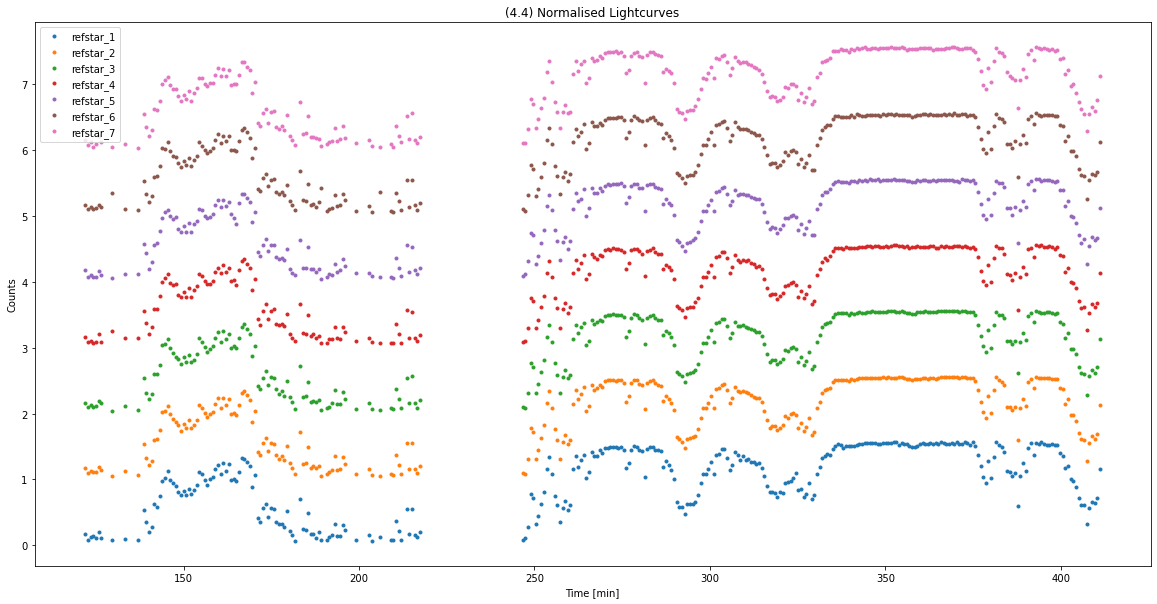

In [45]:
ref_star=[ref_star_1,ref_star_2,ref_star_3,ref_star_4,ref_star_5,ref_star_6,ref_star_7]

plt.figure(figsize=(20,10))
plt.title('(4.4) Normalised Lightcurves')
for i in range(len(ref_star)):
    plt.plot((cal_time), ref_star[i]+i, '.', label = '{}_{}'.format('refstar', i+1))
    
        
#plt.plot((cal_time/60), target_flux_2_norm+9, '.', label = 'TOI 1636.01')
plt.xlabel('Time [min]')
plt.ylabel('Counts')

plt.legend()
plt.show()

Adding the good stars to dat files for further analysis:

In [13]:
ref_star=[ref_star_1, ref_star_2, ref_star_3, ref_star_4, ref_star_5,ref_star_6, ref_star_7]
ref_star_uncert=[ref_star_uncert_1, ref_star_uncert_2, ref_star_uncert_3,ref_star_uncert_4, ref_star_uncert_5,
                 ref_star_uncert_6,ref_star_uncert_7] 

for jj in range(len(ref_star)):
    flux_ref = np.array([])
    flux_uncert = np.array([])

    for i in range(len(ref_star)):

        flux_dat = ref_star[i]
        uncert_dat = ref_star_uncert[i]
    
        flux = flux_dat
        flux_err = uncert_dat
        
        reference = ref_ra[jj]

        flux_ref= np.append(flux_ref, flux_dat)
        flux_uncert = np.append(flux_uncert, flux_err)

    
    with open('{}_{}.dat'.format('new_refstar', jj+3), 'w+') as file:            

        for FLUX, FLUX_UNCERT in zip(flux_ref, flux_uncert):
            file.write('{:20}\t{:20}\t\n'.format(FLUX,FLUX_UNCERT))
        file.close() 

        
#flux in [:,0]
#normalised uncert in [:,1]

Putting them all in a new file

In [14]:
new_ref_star_txt=['new_refstar_1.dat','new_refstar_2.dat','new_refstar_3.dat',
                  'new_refstar_4.dat','new_refstar_5.dat','new_refstar_6.dat','new_refstar_7.dat','new_refstar_8.dat']

with open('new_refstar.txt', 'w+') as f:
    for i in range(len(new_ref_star_txt)): 
        f.write(new_ref_star_txt[i])
        f.write('\n')
    

<h1><center> Section 4.5: Making the text file

In [34]:
# From the manual
# ===============

# Weighted mean: 
# mu_i^{ref} = \sum_j (f_j^_{ref})/(sigma_j^{ref})^2 

# uncertainty on weighted mean: 
# sigma_i^{ref} = \sum_j 1/(sigma_j^{ref})^2 

# reference stars data 
fin_array=cal_time
data_list_flux = ref_star #np.loadtxt('new_refstar.txt', dtype='str')
data_list_uncert= ref_star_uncert 
# exptime for each image (acts as our DATE-OBS)
exptime = fin_array #np.loadtxt('exptime.dat', dtype='str')
# target star data 
#target = np.loadtxt('./analysis_files/target_star.dat')
target = np.loadtxt('deblended_target_star.dat')


#print(data_list)

# empty arrays to store numerator and denominator of mu_i^{ref}
num = np.array([])
denom = np.array([]) 

# loop thr. every ref. star file and calculate the weighted mean and uncertainties using every ref. star
for i in range(len(data_list_flux)):
    #data = np.loadtxt('{}'.format((data_list[i]))) # access data 
    #data_flux= data_list_flux[i]
    flux = data_list_flux[i]
    flux_avg = np.average(flux)
    print(flux_avg)
    #flux_uncert = data[:,1]
    flux_uncert=data_list_uncert[i]
    print(np.average(flux_uncert))
    #  for (4.5)
    num = np.append(num, flux/(flux_uncert**2))
    denom = np.append(denom, 1/(flux_uncert**2))
    
# Reshape to be shape (7,319) so that we can sum over them in each column (i.e. over the same image
# in each reference star) to get the weighted mean; each row is a ref. star., each col. is an image 
 
#print(num_sum, np.shape(num_sum))
#print(denom_sum, np.shape(denom_sum))

num_reshape = np.reshape(num, (7,319))
denom_reshape = np.reshape(denom, (7,319))

num_sum = np.sum(num_reshape, axis=0)
denom_sum = np.sum(denom_reshape, axis=0)

print(np.shape(num_sum), np.shape(denom_sum))
print(np.average(num_sum), np.average(denom_sum))

# weighted mean 
mu_i = num_sum/denom_sum 
print(np.shape(mu_i), np.average(mu_i))

# sigma_i is (uncertainty in weighted mean) is actually just sqrt(1/denom_sum) from eqn. (2) of the manual 

sigma_i = np.sqrt(1/denom_sum)
print(np.shape(sigma_i), np.average(sigma_i))

# find r_i for target data 
# r_i = f_i^{sci}/mu_i^{ref}

# target data 
target_flux = target[:,2]
target_flux_uncert = target[:,3]
r_i = target_flux/mu_i 

print(np.average(r_i))

# uncertainty propagation - not sure 
sigma_r_i = r_i * np.sqrt ( (target_flux_uncert/target_flux)**2 + (sigma_i/mu_i)**2 )
print(np.average(sigma_r_i))

# write to file -- we need DATE_OBS from the headers of every image, which will require accessing
# header of every .new file (which has the astrometric solutions), but we can do that later, if rlly. need to# for now, just putting the exposure times, but the DATE_OBS from header files will be useful to 
# find images for before and after the expected transit 

# from the email: expected transit ~11:35pm with 24 min. uncertainty in the midtransit, until ~1:25am 
'''
with open('./analysis_files/{}_{}.dat'.format('target_star', 'cal' ), 'w+') as file:            

    for DATE_OBS, FLUX, FLUX_UNCERT, WMEAN, WMEAN_UNCERT, RATIO, RATIO_UNCERT in zip(exptime, target_flux, target_flux_uncert, mu_i,sigma_i, r_i, sigma_r_i):
        file.write('{:20}\t{:20}\t{:20}\t{:20}\t{:20}\t{:20}\t{:20}\n'.format(DATE_OBS,FLUX,FLUX_UNCERT,WMEAN, WMEAN_UNCERT,RATIO, RATIO_UNCERT))
    file.close() 
'''

# to get DATE_OBS from header 
date_obs = np.array([])

image_files = np.loadtxt('astrometric_solns.txt', dtype='str')
for ii in range(len(image_files)):
    hdul = fits.open('{}'.format(image_files[ii]))
    obs = hdul[0].header['DATE-OBS']
    #print(hdul[0].header())
    date_obs = np.append(date_obs, obs)

#print(date_obs, np.shape(date_obs)) 

# write to new file 

with open('./analysis_files/{}_{}.dat'.format('target_star_final_file', 'cal' ), 'w+') as file:            

    for DATE_OBS, FLUX, FLUX_UNCERT, WMEAN, WMEAN_UNCERT, RATIO, RATIO_UNCERT in zip(date_obs, target_flux, target_flux_uncert, mu_i,sigma_i, r_i, sigma_r_i):
        file.write('{:20}\t{:20}\t{:20}\t{:20}\t{:20}\t{:20}\t{:20}\n'.format(DATE_OBS,FLUX,FLUX_UNCERT,WMEAN, WMEAN_UNCERT,RATIO, RATIO_UNCERT))
    file.close()


# Identify images that were taken before and after the expected transit 

# identified by hand: 
# start: expected ~ 11:35pm 2021-10-02
# end  : expected ~ 01:25am 2021-10-03
# just before expected transit: DATE-OBS = '2021-10-03T03:34:17.216' 
# just after                  : DATE-OBS = '2021-10-03T05:26:43.963' 
    

1.0000000000000002
0.014564171674936436
1.0000000000000002
0.0018361810394478398
0.9999999999999997
0.0043308276600313176
1.0000000000000002
0.011949876189385731
1.0
0.006895684041783673
1.0
0.008848895989960354
1.0000000000000004
0.010420801231905573
(319,) (319,)
386843.62367600144 420936.16463291214
(319,) 0.9999144911755575
(319,) 0.0015590064782109235
29267.431921786945
548.3317721602057


<h2><center>Base Line Flux Analysis

2021-10-03T03:34:17.216
2021-10-03T05:26:43.963
2021-10-03T03:30:29.958
2021-10-03T05:30:30.129
2021-10-03T03:26:00.099
2021-10-03T05:35:00.252


<Figure size 1440x720 with 0 Axes>

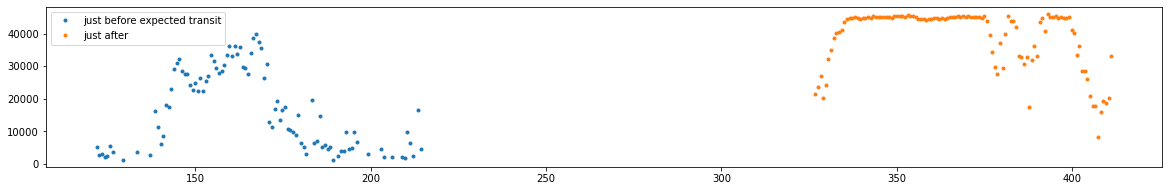

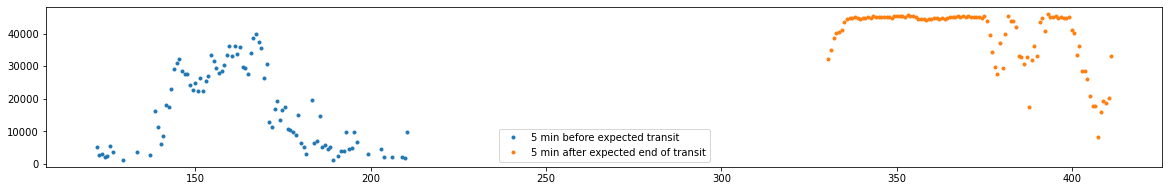

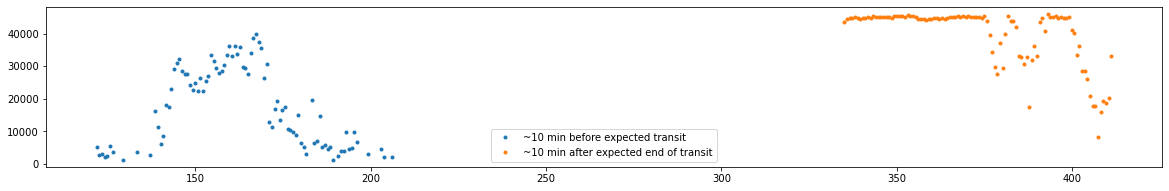

In [77]:
''' ' 
Data structure
==============

in target_star_cal.dat

col 0 = date_obs
col 1 = target flux 
col 2 = target flux uncertainty 
col 3 = weighted mean from ref stars (mu_i)
col 4 = uncertainty in weighted mean (sigma_i)
col 5 = ratio (target_flux/mu_i) (r_i)
col 6 = uncertainty in ratio (sigma_r_i) for which I used error propagation... 
''' 

plt.figure(figsize=(20,10))
date_obs = np.loadtxt('./analysis_files/target_star_final_file_cal.dat', usecols = 0, dtype = 'str')
#print(date_obs)

exptime = fin_array #np.loadtxt('./analysis_files/exptime.dat')

# Identify images that were taken before and after the expected transit
# identified by hand:                                                                                        
# start: expected ~ 11:35pm 2021-10-02                                                                       
# end  : expected ~ 01:25am 2021-10-03                                                                       
# just before expected transit: DATE-OBS = '2021-10-03T03:34:17.216'                                         
# just after                  : DATE-OBS = '2021-10-03T05:26:43.963'       

data = np.loadtxt('./analysis_files/target_star_final_file_cal.dat', usecols = (1,2,3,4,5,6))

flux        = data[:,0]
flux_uncert = data[:,1]
mu_i        = data[:,2]
sigma_i     = data[:,3]
r_i         = data[:,4]
sigma_r_i   = data[:,5]

before = np.where(date_obs == '2021-10-03T03:34:17.216')
after  = np.where(date_obs == '2021-10-03T05:26:43.963')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_before = before[0][0]
ind_after  = after[0][0]

print(date_obs[ind_before])
print(date_obs[ind_after])

date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

before_flux = flux[:ind_before+1]
after_flux = flux[ind_after:]

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.plot(exptime[:ind_before+1], before_flux, '.', label = 'just before expected transit')
plt.plot(exptime[ind_after:], after_flux, '.', label = 'just after')
plt.legend()


#=== try five minutes before and after expected == 

before = np.where(date_obs == '2021-10-03T03:30:29.958')
after  = np.where(date_obs == '2021-10-03T05:30:30.129')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_before = before[0][0]
ind_after  = after[0][0]

print(date_obs[ind_before])
print(date_obs[ind_after])

date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

plt.figure(figsize=(20,10))

before_flux = flux[:ind_before+1]
after_flux = flux[ind_after:]

plt.subplot(3,1,2)
plt.plot(exptime[:ind_before+1], before_flux, '.', label = '5 min before expected transit')
plt.plot(exptime[ind_after:], after_flux, '.', label = '5 min after expected end of transit')
plt.legend()


#=== try ~ten minutes before and after expected == 

before = np.where(date_obs == '2021-10-03T03:26:00.099')
after  = np.where(date_obs == '2021-10-03T05:35:00.252')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_before = before[0][0]
ind_after  = after[0][0]

print(date_obs[ind_before])
print(date_obs[ind_after])

date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

plt.figure(figsize=(20,10))

before_flux = flux[:ind_before+1]
after_flux = flux[ind_after:]

plt.subplot(3,1,3)
plt.plot(exptime[:ind_before+1], before_flux, '.', label = '~10 min before expected transit')
plt.plot(exptime[ind_after:], after_flux, '.', label = '~10 min after expected end of transit')
plt.legend()
plt.show() 

<H1><center> The Final Plot

29312.542724137933
(638,)
(96,) (113,) (319,)
2021-10-03T03:30:29.958
2021-10-03T05:30:30.129
2021-10-03T03:26:00.099
2021-10-03T05:35:00.252


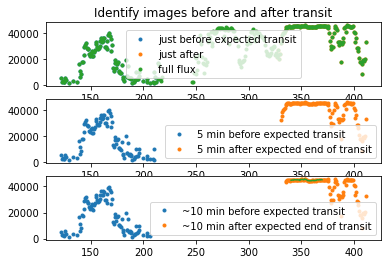

0.65
(7,)
(10,)
(15,)
(15,)
(15,)
(12,)
(6,)
(11,)
(0,)
(0,)
(9,)
(15,)
(15,)
(15,)
(14,)
(14,)
(14,)
(14,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)


/Users/stargazer0098/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/stargazer0098/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/stargazer0098/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/stargazer0098/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/stargazer0098/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


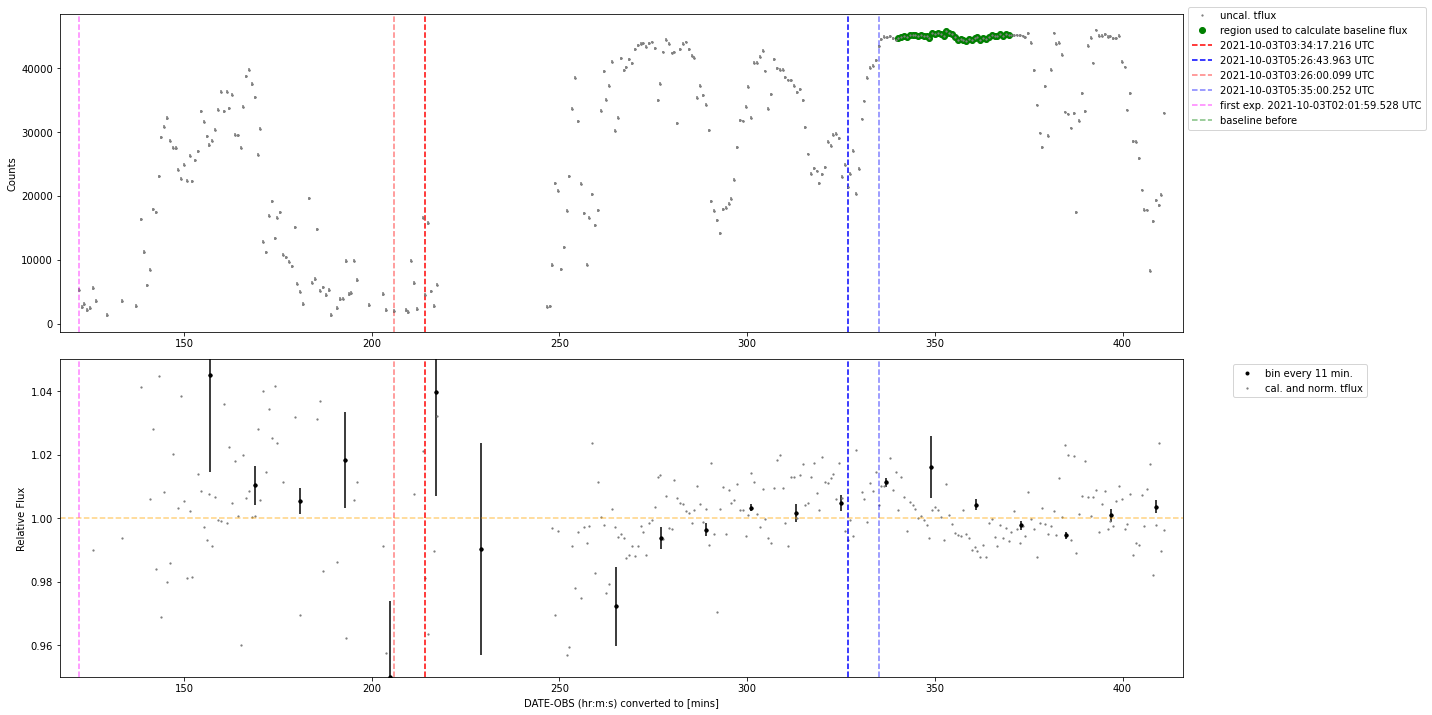

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits 

''' 
Data structure
==============

in target_star_cal.dat

col 0 = date_obs
col 1 = target flux 
col 2 = target flux uncertainty 
col 3 = weighted mean from ref stars (mu_i)
col 4 = uncertainty in weighted mean (sigma_i)
col 5 = ratio (target_flux/mu_i) (r_i)
col 6 = uncertainty in ratio (sigma_r_i) for which I used error propagation... 
''' 

date_obs = np.loadtxt('./analysis_files/target_star_final_file_cal.dat', usecols = 0, dtype = 'str')
#print(date_obs)

#exptime = np.loadtxt('./analysis_files/exptime.dat')

# Identify images that were taken before and after the expected transit
# identified by hand:                                                                                        
# start: expected ~ 11:35pm 2021-10-02                                                                       
# end  : expected ~ 01:25am 2021-10-03                                                                       
# just before expected transit: DATE-OBS = '2021-10-03T03:34:17.216'                                         
# just after                  : DATE-OBS = '2021-10-03T05:26:43.963'       

# avoiding column with date_obs since that is a string and so read it in separately 
data = np.loadtxt('./analysis_files/target_star_final_file_cal.dat', usecols = (1,2,3,4,5,6))
#data = np.loadtxt('deblended_target_star.dat', usecols = (1,2,3,4,5,6))


flux        = data[:,0]
print(np.average(flux))
flux_uncert = data[:,1]
mu_i        = data[:,2]
sigma_i     = data[:,3]
r_i         = data[:,4]
sigma_r_i   = data[:,5]

before = np.where(date_obs == '2021-10-03T03:34:17.216')
after  = np.where(date_obs == '2021-10-03T05:26:43.963')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_just_before = before[0][0]
ind_just_after  = after[0][0]

#print(date_obs[ind_before])
#print(date_obs[ind_after])

#date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
#date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

before_flux = flux[:ind_just_before+1]
after_flux = flux[ind_just_after:]

# ===========================================================================================================
# for time x-axis in seconds (converting hr:m:s from DATE-OBS to seconds) 
# determination hr:mm:ss.s from DATE-OBS


#loading text file which as file name and exposure time.
f=np.loadtxt('DATE-OBS.txt', dtype=str)


#take only the file names or first coloumn
c=np.array([f[:,1]])

#it's a 2D array, so we convert it to 1D for analysis
s=c.flatten()

#print(s.shape)
#print(s)

#Now we split the text in the file in strings in a list w 
#the end goal is get the number, we dont want the T so we get rid of it
w=np.array([])
for i in s:
    y=i.split('T')
    w=np.append(w,y)

#prints out shape of the w array now it has date and time

print(w.shape)

#However it is 1D so we need to convert to 2D to retrive time
n=np.reshape(w, (319,2))

#saving hour in p
p=n[:,1]


#now we convert the string from the array in hh:mm:ss.sss to just ss.sss
import datetime

caltime=np.array([])
for i in range(len(p)):
    test=p[i]
    h,m,s=test.split(':')
    total_sec=(datetime.timedelta(hours=int(h),minutes=int(m),seconds=float(s)).total_seconds())
    caltime=np.append(caltime,total_sec/60)
    
#print(cal_time)

print(np.shape(before_flux), np.shape(after_flux), np.shape(flux))


# TRY SOME PLOTS 

plt.subplot(3,1,1)
plt.title('Identify images before and after transit')
plt.plot(caltime[:ind_just_before+1], before_flux, '.', label = 'just before expected transit')
plt.plot(caltime[ind_just_after:], after_flux, '.', label = 'just after')
plt.plot(caltime, flux, '.', label = 'full flux')


plt.legend()


#=== try five minutes before and after expected == 

before = np.where(date_obs == '2021-10-03T03:30:29.958')
after  = np.where(date_obs == '2021-10-03T05:30:30.129')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_before = before[0][0]
ind_after  = after[0][0]

print(date_obs[ind_before])
print(date_obs[ind_after])

date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

before_flux = flux[:ind_before+1]
after_flux = flux[ind_after:]

plt.subplot(3,1,2)
plt.plot(caltime[:ind_before+1], before_flux, '.', label = '5 min before expected transit')
plt.plot(caltime[ind_after:], after_flux, '.', label = '5 min after expected end of transit')
plt.legend()


#=== try ~ten minutes before and after expected == 

before = np.where(date_obs == '2021-10-03T03:26:00.099')
after  = np.where(date_obs == '2021-10-03T05:35:00.252')

# np.where returns array([indices]) so to get the one and only then do 
# array[0][0] --> array[0] returns [indices] and then array[0][0] gives the first index of the [indices] 

#print(before[0][0]) # index for image before 
#print(after[0][0])  # index for image after 

ind_before = before[0][0]
ind_after  = after[0][0]

print(date_obs[ind_before])
print(date_obs[ind_after])

date_obs_before = date_obs[:ind_before+1] # 02:01:59.528 to 03:34:17.216
date_obs_after  = date_obs[ind_after:]    # 05:26:43.963 to 06:51:06.636

#print(date_obs_before[0], date_obs_before[-1]) 
#print(date_obs_after[0], date_obs_after[-1])

before_flux = flux[:ind_before+1]
after_flux = flux[ind_after:]

plt.subplot(3,1,3)
plt.plot(caltime[:ind_before+1], before_flux, '.', label = '~10 min before expected transit')
plt.plot(caltime[ind_after:], after_flux, '.', label = '~10 min after expected end of transit')

good = np.where( (caltime > 340) & (caltime < 370) )

plt.plot(caltime[good], flux[good])

plt.legend()
plt.show() 


# I'll work with the data that is ~10 min before expected start and ~10 min after the expected end of transit
# for now at least 

cal_before_flux = before_flux/np.average(before_flux)
cal_after_flux = after_flux/np.average(after_flux) 

# Plot - compare the uncalibrated and "calibrated" for baseline det.
'''
plt.subplot(3,1,1)
plt.plot(exptime[:ind_before+1], before_flux, '.', label = '~10 min before expected transit')
plt.plot(exptime[ind_after:], after_flux, '.', label = '~10 min after expected end of transit')
plt.legend()
plt.subplot(3,1,2)
plt.plot(exptime[:ind_before+1], cal_before_flux, '.', label = 'baseline ~10 min before')
plt.plot(exptime[ind_after:], cal_after_flux, '.', label = 'baseline ~10 min after')
plt.legend()
plt.subplot(3,1,3)
plt.plot(exptime, flux, '.', label = 'full')
plt.legend()
plt.show()
''' 

# try dividing r_i by np.average(after_flux) ? 
cal_r_i       = r_i/np.average(after_flux)
# actually try with just flat part of raw target flux from 340 to 375 minutes 
cal_r_i       = r_i/np.average(flux[good])

#cal_r_i       = r_i/np.average(before_flux)
cal_sigma_r_i = sigma_r_i/np.average(after_flux)

cal_sigma_r_i = sigma_r_i/np.average(flux[good])

avg_cal_r_i = np.average(cal_r_i)

print(np.round(avg_cal_r_i, decimals = 2))

# Plot normalized r_i (normalized by baseline flux *after* expected transit) and flux 
'''
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
plt.plot(caltime, (r_i), '.', label = 'r_i')
plt.legend()

plt.subplot(3,1,2)
plt.plot(caltime, (cal_r_i), '.', label = 'r_i divided by baseline flux after')
plt.plot(caltime[:ind_just_before+1], cal_r_i[:ind_just_before+1], '.',  label = 'just before transit')
plt.plot(caltime[ind_just_after:], cal_r_i[ind_just_after:], '.', label = 'just after transit')
plt.ylim(0.85,1.05)
plt.legend(fontsize='x-small') 

plt.subplot(3,1,3)
plt.plot(caltime, (cal_r_i), '.', label = 'r_i divided by baseline flux after')
plt.plot(caltime[:ind_before+1], cal_r_i[:ind_before+1], '.',  label = '10 min before transit')
plt.plot(caltime[ind_after:], cal_r_i[ind_after:], '.', label = '10 min after transit')
plt.ylim(0.85,1.05)
#plt.xlim(6000,8000)

plt.legend(fontsize='x-small') 

#plt.savefig('div_baseline_4.5.png')
plt.show() 
''' 

#print(np.average(r_i))
#print(np.average(flux))
#print(np.average(after_flux))


'''plt.figure(figsize = (12,7))
plt.subplots_adjust(right=0.7)
#plt.subplot(3,1,1)
plt.subplot(2,1,1)
plt.plot(caltime, flux, '.', color = 'grey', markersize = 3.5, label = 'uncal. tflux')
plt.plot(caltime[good], flux[good], 'g.', markersize = 3.5, label = 'region used to calculate baseline flux')


plt.axvline(x = caltime[ind_just_before], color = 'red', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_just_before]))
plt.axvline(x = caltime[ind_just_after], color = 'blue', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_just_after]))

plt.axvline(x = caltime[ind_before], color = 'red', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_before]), alpha = 0.5)
plt.axvline(x = caltime[ind_after], color = 'blue', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_after]), alpha = 0.5)
plt.axvline(x = caltime[0], color = 'magenta', linestyle = 'dashed', label = 'first exp. {} UTC'.format(date_obs[0]), alpha = 0.5)

plt.ylabel('Counts')

plt.legend(fontsize = 'small', bbox_to_anchor = (1.04,1), loc='upper left')

#plt.tight_layout(rect=[0,0,0.5,5])
# --

plt.subplot(3,1,2)
plt.plot(caltime, cal_r_i/avg_cal_r_i, '.', color = 'grey', markersize = 3.5, label = 'cal. and norm. tflux')


plt.axvline(x = caltime[ind_just_before], color = 'red', linestyle = 'dashed')
plt.axvline(x = caltime[ind_just_after], color = 'blue', linestyle = 'dashed')

plt.axvline(x = caltime[ind_before], color = 'red', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[ind_after], color = 'blue', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[0], color = 'magenta', linestyle = 'dashed', alpha = 0.5)

plt.axhline(y = 1.0, color = 'orange', linestyle = 'dashed', alpha = 0.5)

plt.ylim(0.85,1.10)
plt.ylabel('Relative Flux')


plt.legend(fontsize = 'small', bbox_to_anchor = (1.04,1), loc='upper left')
plt.tight_layout(rect=[0,0,0.75,1])
 
#-- 

#plt.subplot(3,1,3)
plt.subplot(2,1,2)
count = 0 
averages = np.array([])

cal_sigma_r_i_av = np.array([])
stddev = np.array([])
# try binning every 7 images 
ii = 0
n = 11 

while (ii < len(cal_r_i)):
    # bin every seven images ~45 s * 7 ~ 5 min 
    print(np.shape(cal_r_i[ii:ii+n]))
    # is ok to take uncertainty on mean since each exp. can essentially be taken as same obs 
    # which means we are taking mean of many of "same" measurements -- so 
    # sigma_mean = stddev/sqrt(N) where N is number of meas. and stddev is the stddev of those N meas. 

    averages = np.append(averages, np.average(cal_r_i[ii:ii+n]))
    stddev = np.std(cal_sigma_r_i[ii:ii+n])
 



    # does look like one point in the sets of 11 images, does carry over into average of 10 images across gap
    # looks like accessing by time is better; i.e. in sets of 7 mins rather than across sets of 11 images
    
    cal_sigma_r_i_av = np.append(cal_sigma_r_i_av, stddev/np.sqrt(n))
    print(ii)
    ii += n

    
print(np.shape(averages))
print(np.shape(caltime[::n]))
print(np.shape(cal_sigma_r_i_av))
print(averages)

plt.plot(caltime, (cal_r_i/avg_cal_r_i), '.', color = 'grey', markersize = 3.5,  label = 'cal. and norm. tflux')
plt.plot(caltime[::n], averages/avg_cal_r_i, 'k.', label= 'resample -- every {} images?'.format(n))
#plt.plot(caltime[:ind_before+1], cal_r_i[:ind_before+1], '.',  label = '10 min before transit')
#plt.plot(caltime[ind_after:], cal_r_i[ind_after:], '.', label = '10 min after transit')
plt.errorbar(caltime[::n], averages/avg_cal_r_i, yerr = cal_sigma_r_i_av/(avg_cal_r_i), fmt = 'k.')


plt.axvline(x = caltime[ind_just_before], color = 'red', linestyle = 'dashed')
plt.axvline(x = caltime[ind_just_after], color = 'blue', linestyle = 'dashed')


plt.axvline(x = caltime[ind_before], color = 'red', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[ind_after], color = 'blue', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[0], color = 'magenta', linestyle = 'dashed', alpha = 0.5)

plt.axhline(y = 1.0, color = 'orange', linestyle = 'dashed', alpha = 0.5)

plt.ylim(0.95,1.05)
plt.ylabel('Relative Flux')
plt.xlabel('DATE-OBS (hr:m:s) converted to [mins]')

plt.legend(fontsize = 'small', bbox_to_anchor = (1.04,1), loc='upper left')
#plt.tight_layout(rect=[0,0,0.5,0.5])

plt.show()
'''
    



plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(caltime, flux, '.', color = 'grey', markersize = 2.5, label = 'uncal. tflux')
plt.errorbar(caltime, flux, yerr = flux_uncert, fmt = '.', color = 'grey', markersize = 2.5)
plt.plot(caltime[good], flux[good], 'go', label = 'region used to calculate baseline flux')

plt.axvline(x = caltime[ind_just_before], color = 'red', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_just_before]))
plt.axvline(x = caltime[ind_just_after], color = 'blue', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_just_after]))

plt.axvline(x = caltime[ind_before], color = 'red', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_before]), alpha = 0.5)
plt.axvline(x = caltime[ind_after], color = 'blue', linestyle = 'dashed', label = '{} UTC'.format(date_obs[ind_after]), alpha = 0.5)
plt.axvline(x = caltime[0], color = 'magenta', linestyle = 'dashed', label = 'first exp. {} UTC'.format(date_obs[0]), alpha = 0.5)
plt.axhline(y=1.01, xmin=50, xmax=150, color='green', linestyle = 'dashed', alpha = 0.5 , label='baseline before')


plt.ylabel('Counts')
plt.xlim(caltime[0]-5,caltime[-1]+5)
plt.legend(bbox_to_anchor = (1.0,1.04), loc='upper left')
#plt.tight_layout(rect=[0,0,0.75,1])
#plt.tight_layout(rect=[0,0,0.5,5])
# --

#plt.show()
#-- 

# Bin the datapoints using time; e.g. every 11 minutes 
    
binned_flux = np.array([])
binned_uncert = np.array([]) 

N = 11 # number of minutes binning by 

beginning = caltime[0] # time of first exposure 
ending = beginning + N # endtime of first binning 

# keep running loop until "ending" is greater than the time of the last exposure 
plt.subplot(2,1,2)
while (ending < caltime[-1]):
    # find indices for datapoints that fall within the time binning (every eleven minutes) 
    bin = np.where( (caltime > beginning) & (caltime < ending) )

    bintime = caltime[bin]
    print(np.shape(bintime)) # check how many images are being binned in each set 
    
    # bin them 
    bin_flux = np.average(cal_r_i[bin])
    # uncertainty is: (standard deviation in fluxes/ sqrt(N)) where N is the number of measurements 
    # the number of measurements per each set exposures being binned could be different
    # since we are binning every image that falls within each N minute time interval

    bin_uncert = np.std(cal_r_i[bin]) / np.sqrt(np.size(bin))
    
    # append them to new arrays 
    binned_flux = np.append(binned_flux, bin_flux)
    binned_uncert = np.append(binned_uncert, bin_uncert) 

    beginning = beginning + N + 1 # start of next binning
    ending = ending + N + 1 # end of next beginning 
    
    # if there in a binning, plot binned point
    if (np.size(bin) > 0):
        plt.plot(ending, bin_flux/avg_cal_r_i, 'k.', label = 'bin every {} min.'.format(N))
        plt.errorbar(ending, bin_flux/avg_cal_r_i, yerr = bin_uncert/avg_cal_r_i, fmt = 'k.')

# Binned Light Curve: 

plt.plot(caltime, (cal_r_i/avg_cal_r_i), '.', color = 'grey', markersize = 2.5,  label = 'cal. and norm. tflux')
#plt.errorbar(caltime, (cal_r_i/avg_cal_r_i), yerr = sigma_r_i/avg_cal_r_i, fmt = '.', color = 'grey', markersize = 1.5)
plt.axvline(x = caltime[ind_just_before], color = 'red', linestyle = 'dashed')
plt.axvline(x = caltime[ind_just_after], color = 'blue', linestyle = 'dashed')

plt.axvline(x = caltime[ind_before], color = 'red', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[ind_after], color = 'blue', linestyle = 'dashed', alpha = 0.5)
plt.axvline(x = caltime[0], color = 'magenta', linestyle = 'dashed', alpha = 0.5)
plt.axhline(y=1.01, xmin=50, xmax=150, color='green', linestyle = 'dashed', alpha = 0.5 )

plt.axhline(y = 1.0, color = 'orange', linestyle = 'dashed', alpha = 0.5)

#plt.axhline(y=1.01, color = 'green', alpha = 0, label = 'estimated baseline') 


plt.ylim(0.95,1.05)
plt.ylabel('Relative Flux')
plt.xlabel('DATE-OBS (hr:m:s) converted to [mins]')

# Get rid of duplicate labels in legend 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor = (1.04,1), loc='upper left')

plt.tight_layout()
plt.xlim(caltime[0]-5,caltime[-1]+5)
plt.show()

    
